# Метод Ньютона

## Нелинейное уравнение

### $ctg(x)-x^2 = 0$

In [1]:
eps = 10**(-4)

In [2]:
f = lambda x: 1/(np.tan(x))-x**2
df = lambda x: -2*x-(1/np.tan(x))**2-1

C:\Users\User\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(*args, **kw)>

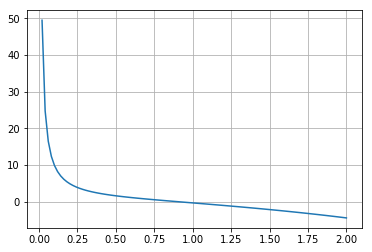

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.subplots()
x = np.linspace(0, 2,100)
plt.plot(x, f(x))
plt.grid()
plt.show

In [4]:
a, b = 0.5, 1.5

In [5]:
def search(a, b, n = 10**2-1):
    step = abs(b-a)/n
    for i in range(n):
        if f(a+i*step) * f(a+(i+1)*step) < 0:
            st = i
            break
    a0 = a+st*step
    b0 = a+step*(st+1)
    return a0, b0

a0, b0 = search(a, b)

In [6]:
def newton(f, a0, b0):
    x_old = a0
    x_new = a0+b0
    while abs(x_new - x_old) > eps:
        c = x_old - f(x_old)/df(x_old)
        if c > a0 and c < b0:
            if f(c) > 0: a0 = c
            else: b0 = c
        else:
            c = (a0+b0)/2
        x_old, x_new = x_new, c
    return x_new

In [7]:
newton(f, a0, b0)

0.8952060453842308

## Система уравнений

### \begin{cases} cos(x+0.5)+y = 0.8\\sin(y)-2x=1.6 \end{cases}

C:\Users\User\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  


<function matplotlib.pyplot.show(*args, **kw)>

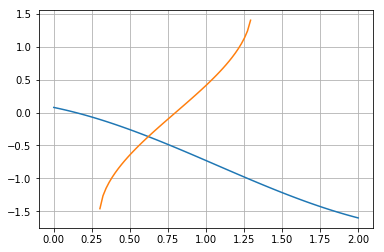

In [8]:
from numerical_methods import gauss, Array, v_norm_1
fig = plt.subplots()
x = np.linspace(0, 2,100)
f1 = lambda x: np.cos(x+0.5) -0.8
plt.plot(x, f1(x))
f2 = lambda x: np.arcsin(2*x-1.6)
plt.plot(x, f2(x))
plt.grid()
plt.show

In [9]:
N = 100

f1_i = lambda x, y, i: (i/N)*np.cos(x+0.5) + y - 0.8
f2_i = lambda x, y, i: (i/N)*np.sin(y) - 2*x - 1.6

df1_i_x = lambda x, y, i: -(i/N)*np.sin(x+0.5)
df1_i_y = lambda x, y, i: 1
df2_i_x = lambda x, y, i: -2
df2_i_y = lambda x, y, i: (i/N)*np.cos(y)

y0 = 0.8
x0 = -0.8

In [10]:
def newtom_system(f1_i, f2_i, df1_i_x, df1_i_y, df2_i_x, df2_i_y, x0, y0):
    for i in range(1, N+1):
        df1_x  = df1_i_x(x0, y0, i)
        df1_y  = df1_i_y(x0, y0, i)
        df2_x  = df2_i_x(x0, y0, i)
        df2_y  = df2_i_y(x0, y0, i)
    
        A = Array([[df1_x, df1_y], [df2_x, df2_y]])
        b = Array([[-f1_i(x0, y0, i), -f2_i(x0, y0, i)]])
        g, h = gauss(A, b).array
        
        x0 += g[0]
        y0 += h[0]
        if v_norm_1(Array([g[0], h[0]])) < eps: break
    return x0, y0

In [11]:
newtom_system(f1_i, f2_i, df1_i_x, df1_i_y, df2_i_x, df2_i_y, x0, y0)

(-0.8665863790379945, -0.13356568186396559)